# Shilpi Dubey
Data science & Business Analytics Intern @GRIP The Sparks Foundation

### TASK 2
Prediction using Unsupervised ML

### Objective:
Predict the optimum number of clusters from the given dataset and represent it visually.

#### Installing necessary packages and importing the libraries

In [ ]:
install.packages("ggcorrplot")
install.packages("GGally")
install.packages("ggplot2")
install.packages("gridExtra")
library(ggcorrplot)
library(GGally)
library(graphics)
library(readr)
library(dplyr)
library(ggplot2)
library(cluster)
library(gridExtra)

#### Importing the dataset

In [21]:
iris <- read.csv("D:/Learning R/Iris.csv")

In [22]:
head(iris) # reading first few rows of dataset

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [24]:
#removing the id column as it is of no use
iris <- subset(iris, select = -c(Id))

#### Detemining the structure of the dataset

In [25]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [26]:
summary(iris) #statistical details of dataset

 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

#### Checking for NAs

In [28]:
table(is.na(iris))


FALSE 
  750 

#### Visualizing the dataframe

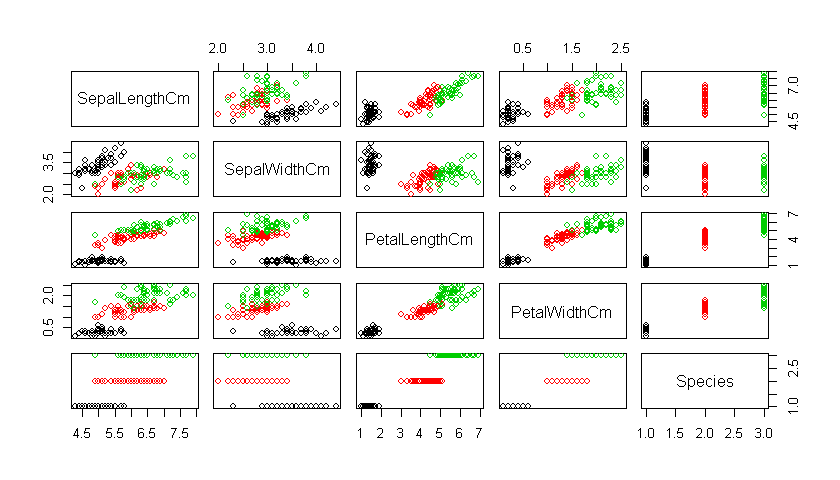

In [31]:
options(repr.plot.width=7, repr.plot.height=4)
plot(iris, col = iris$Species)

#### Visualizing Sepal Length vs Sepal Width 

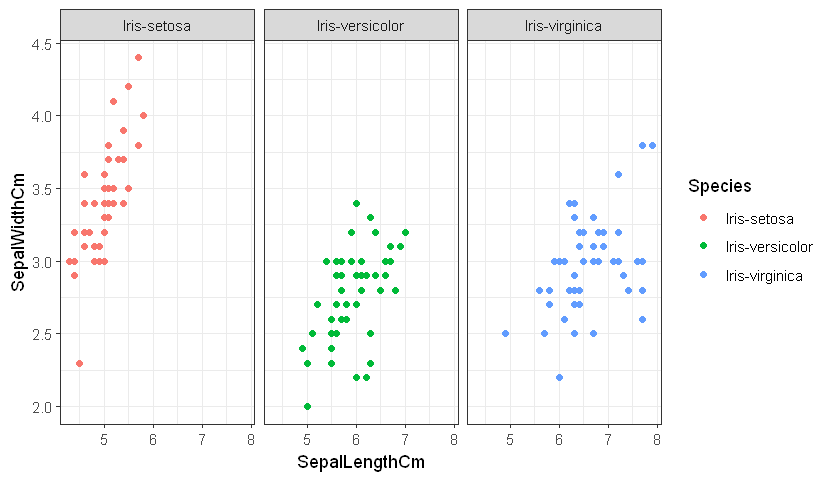

In [11]:
ggplot(iris)+
  geom_point(aes(x = SepalLengthCm, y = SepalWidthCm,color = Species))+
  facet_wrap(~ Species)+ 
  theme_bw()

#### Visualizing Petal Length vs Petal Width

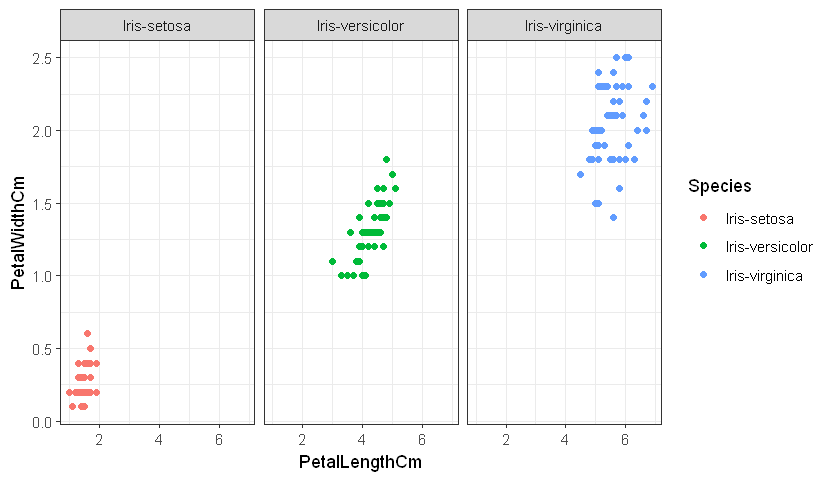

In [12]:
ggplot(iris)+
  geom_point(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species))+
  facet_wrap(~ Species)+ theme_bw()

#### Correlation plot of the data

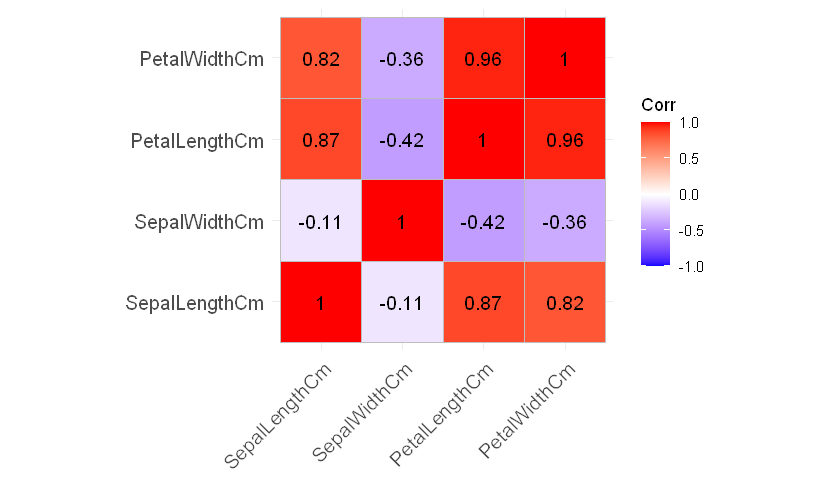

In [13]:
ggcorrplot(cor(iris[,1:4]), lab = TRUE)

#### Pairs Plot of the data

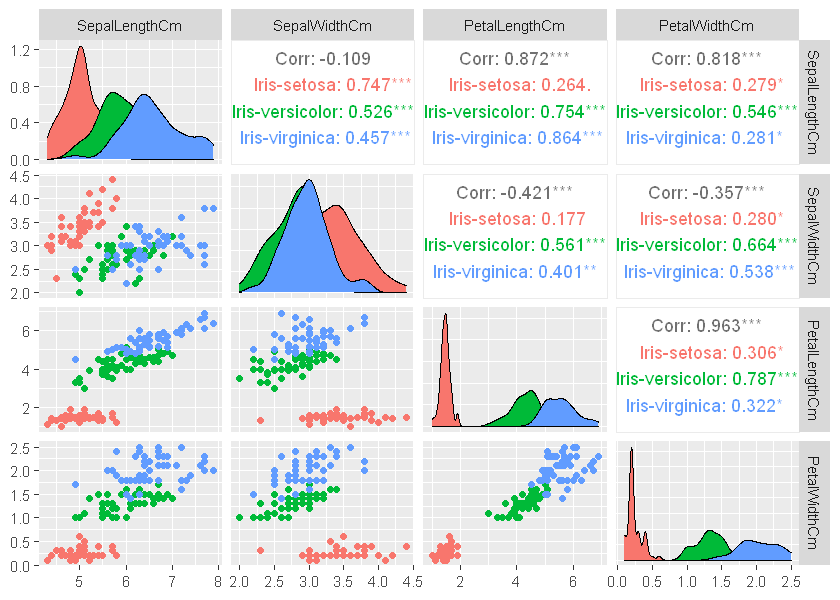

In [14]:
options(repr.plot.width=7, repr.plot.height=5)
ggpairs(data = iris, columns = 1:4, aes(col = Species))

#### Elbow Method using within-cluster-sum-of-squares(wcss)

In [15]:
set.seed(234)
iris_k <- iris[,1:4]
iris_k <- as.matrix(iris_k)
k_max <- 6
wss <- sapply(1:k_max, function(k){kmeans(iris_k, k, iter.max = 100, nstart = 10)$tot.withinss})
wss

[1] 680.82440 152.36871  78.94084  57.31787  46.53558  38.93096

#### Finding optimum number of clusters by visualizing the Elbow graph

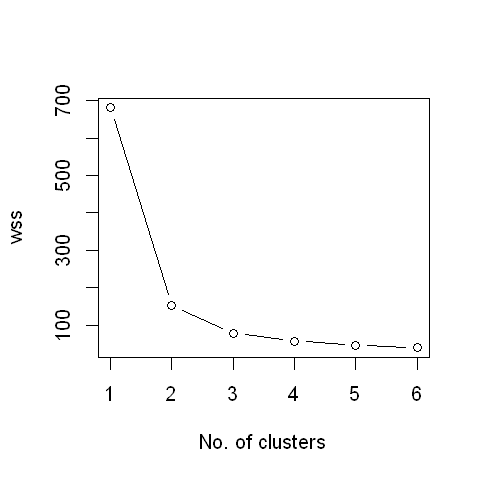

In [103]:
options(repr.plot.width=4, repr.plot.height=4)
plot(1:k_max,wss,type = "b", xlab = "No. of clusters")

#### Forming the cluster using K-means clustering

In [17]:
iris_cluster <- kmeans(iris_k,3, nstart = 10, iter.max = 100)
iris_cluster

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      5.901613     2.748387      4.393548     1.433871
2      5.006000     3.418000      1.464000     0.244000
3      6.850000     3.073684      5.742105     2.071053

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   2   2   2   2   2   2   2   1   1   3   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   3   1   1 
 81  82  83  84  85  86  87  88  89  

#### Visualizing the cluster

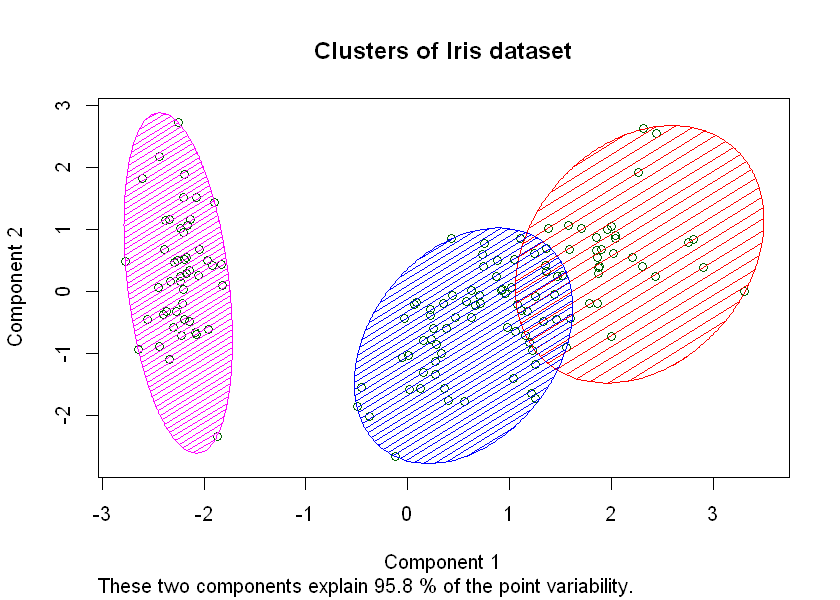

In [33]:
options(repr.plot.width=7, repr.plot.height=5)
clusplot(iris_k,iris_cluster$cluster, lines = 0, shade = TRUE, color = TRUE, plotchar = FALSE, 
           main = "Clusters of Iris dataset")

#### Combining the cluster number allotted to the iris dataset

In [34]:
clustered_data <- cbind(iris,cluster_number = iris_cluster$cluster)
head(clustered_data)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_number
5.1,3.5,1.4,0.2,Iris-setosa,2
4.9,3.0,1.4,0.2,Iris-setosa,2
4.7,3.2,1.3,0.2,Iris-setosa,2
4.6,3.1,1.5,0.2,Iris-setosa,2
5.0,3.6,1.4,0.2,Iris-setosa,2
5.4,3.9,1.7,0.4,Iris-setosa,2


In [35]:
table(clustered_data$Species, clustered_data$cluster_number)

                 
                   1  2  3
  Iris-setosa      0 50  0
  Iris-versicolor 48  0  2
  Iris-virginica  14  0 36

[(50+48+36)/150 * 100] = 89.33% of k means cluster matches the actual species cluster

In [36]:
clustered_data$cluster_number <- as.factor(clustered_data$cluster_number)

#### Comparing Sepal Length vs Sepal Width plot 

In [96]:
a <- iris %>% ggplot(aes(x=SepalLengthCm, y= SepalWidthCm, color = Species)) + geom_point() + theme(legend.position="bottom")
b <- clustered_data %>% ggplot(aes(x=SepalLengthCm, y=SepalWidthCm)) + 
  geom_point(aes(color = cluster_number))+
  geom_point(aes(x = iris_cluster$centers[1,1], y= iris_cluster$centers[1,2]), pch = 24, size=3, fill = "maroon") +
  geom_point(aes(x = iris_cluster$centers[2,1], y= iris_cluster$centers[2,2]), pch = 24, size=3, fill = "maroon") +
  geom_point(aes(x = iris_cluster$centers[3,1], y= iris_cluster$centers[3,2]), pch = 24, size=3, fill = "maroon") +
  theme(legend.position="bottom")

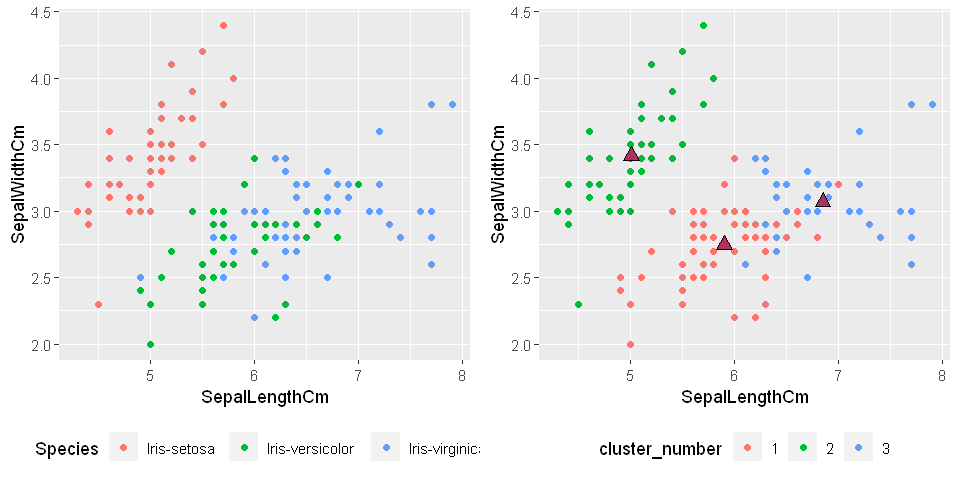

In [97]:
options(repr.plot.width=8, repr.plot.height=4)
grid.arrange(a,b,ncol=2)

#### Comparing Petal Length vs Petal width plot 

In [101]:
c <- iris %>% ggplot(aes(x=PetalLengthCm, y= PetalWidthCm, color = Species)) + geom_point() + theme(legend.position="bottom")
d <- clustered_data %>% ggplot(aes(x=PetalLengthCm, y=PetalWidthCm)) + 
  geom_point(aes(color=cluster_number)) +
  geom_point(aes(x = iris_cluster$centers[1,3], y= iris_cluster$centers[1,4]), pch = 24, size=3, fill = "maroon") + 
  geom_point(aes(x = iris_cluster$centers[2,3], y= iris_cluster$centers[2,4]), pch = 24, size=3, fill = "maroon") +
  geom_point(aes(x = iris_cluster$centers[3,3], y= iris_cluster$centers[3,4]), pch = 24, size=3, fill = "maroon") +
  theme(legend.position="bottom")

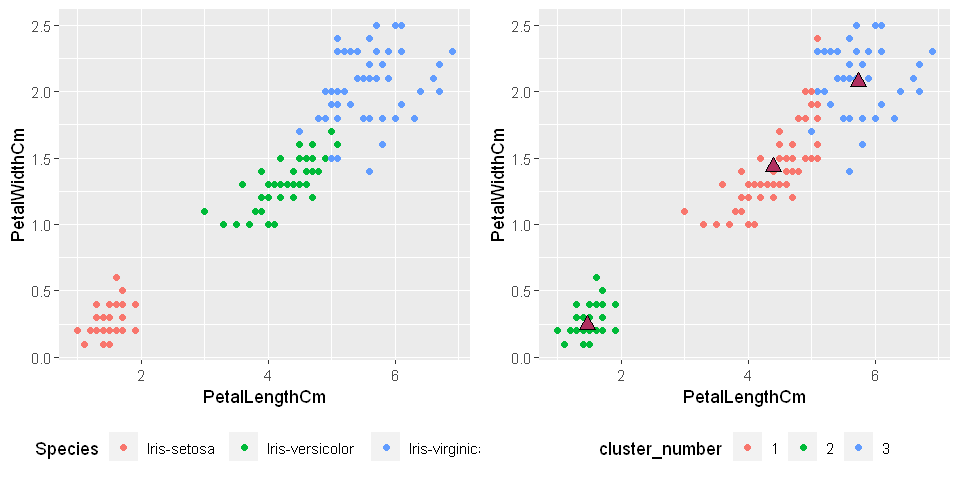

In [102]:
options(repr.plot.width=8, repr.plot.height=4)
grid.arrange(c,d,ncol=2)

## CONCLUSION:
We can conclude that our plotted graphs of predicted clusters are almost similar to actual ones with 89% accuracy.

### THANKYOU!